In [ ]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from math import exp
from PIL import Image

#Convolution function:

It accepts as input an image, a filter kernel, stride, padding and the non-
linear function. The function must convolve the input image (after padding if specified) with the 
kernel (at the specified stride size) and generate an output activation after applying the specified
non-linearity. Verify with the standard options for the non-linear activation functions - sigmoid,
tanh, ReLU, Parametric ReLU (PReLU). Display the input image, the filter kernel and the output
activation map. Ensure that your function can accept multi-channel input and a corresponding kernel
volume.

In [ ]:
def Padding(imgdata,v,h_p):
  h,w=imgdata.shape
  zeropad=np.zeros(h)
  for i in range(v):
     imgdata=np.insert(imgdata,0,values=zeropad,axis=1)
     imgdata=np.insert(imgdata,w,values=zeropad,axis=1)
  h,w=imgdata.shape   
  zeropad=np.zeros(w)
  for i in range(h_p):
     imgdata=np.insert(imgdata,0,values=zeropad,axis=0)
     imgdata=np.insert(imgdata,h,values=zeropad,axis=0)
  return imgdata   

In [ ]:
def getkernelfromImg(imgdata,k,l):
  kernel=imgdata[0:k,0:l,:]
  return kernel

In [ ]:
def Rescale(img):
  img= ((img - img.min()) * (1/(img.max() - img.min()) * 255)).astype('uint8')
  return img

In [ ]:
def Flip180(kernel,h,w):
  flippedkernel=kernel.copy()
  for i in range(h%2):
    flippedkernel[i,:],flippedkernel[h-i-1,:]=kernel[h-i-1,:],kernel[i,:]
  k=flippedkernel.copy() 
  for i in range(w%2):
    flippedkernel[:,i],flippedkernel[:,w-i-1]=k[:,w-i-1],k[:,i]
  return flippedkernel 

In [ ]:
def Flip(kernel):
  h,w,c=kernel.shape
  flipk=kernel.copy()
  for i in range(c):
    flipk[:,:,i]= Flip180(kernel[:,:,i],h,w)
  return flipk  

In [ ]:
def ExtractCentralRegion(Img,w_org,h_org):
  h,w,c=Img.shape
  k_w=w-w_org
  k_h=h-h_org
  return Img[k_h:k_h+w_org,k_w:k_w+h_org,:]   

In [ ]:
def ExtractImgPatch(img,i,j,k,l,stride):
  if i!=0:
    i=i+stride[0]-1
  if j!=0:  
    j=j+stride[1]-1  
  img_patch=img[i:i+k,j:j+l]
  return img_patch

In [ ]:
def OperateByPatch(img,kernel,i,j,stride):
    h,w=kernel.shape
    img_p=ExtractImgPatch(img,i,j,h,w,stride)
    return np.sum(np.multiply(img_p,kernel))

In [ ]:
def Convolution(image,kernel,stride=[1,1],padding=[0,0],non_linear_fn='tanh',display=True):
  if display:
   print("Kernel")
   print(kernel)
  k_h,k_w,c=kernel.shape
  h,w,c=image.shape
  kernel=Flip(kernel)
  op_dim=[int((h-k_h+2*padding[0])/stride[0]+1),int((w-k_w+2*padding[1])/stride[1]+1),c]
  channelwise_convolved_image=np.zeros(op_dim[0]*op_dim[1]*op_dim[2]).reshape(op_dim[0],op_dim[1],op_dim[2])
  for ch in range(c):
        reflectedimage=Padding(image[:,:,ch],padding[0],padding[1])
        for i in range(op_dim[0]):
            for j in range(op_dim[1]):
              channelwise_convolved_image[i,j,ch]=OperateByPatch(reflectedimage,kernel[:,:,ch],i,j,stride)
  convolved_image=np.sum(channelwise_convolved_image,axis=2)           
  activation_map=ApplyActivationfn(Rescale(convolved_image),non_linear_fn)  
  if display:          
    print("Activation map")
    plt.imshow(activation_map)
    plt.show()
  return activation_map

In [ ]:
def ApplyActivationfn(J,fname):
  h,w=J.shape
  activation_map=np.zeros(h*w).reshape(h,w)
  for i in range(h):
      for j in range(w):
         activation_map[i,j]=Activationfn(J[i,j],fname)
  return activation_map       

In [ ]:
def Activationfn(x,fname='tanh',alpha=0.1):
  if fname=='sigmoid':
    op=1/(1+exp(-x))
  if fname=='tanh':
    op=(exp(x)-exp(-x))/(exp(x)+exp(-x)) 
  if fname=='relu':
     if x>0:
       op= x
     else:
       op= 0   
  if fname=='prelu':
     if x>0:
       op= x
     else:
       op= alpha*x  
  return op     

In [ ]:
def ReadImage(imagename):
 image = Image.open(imagename)
 image_data=np.array(image)
 return image,image_data

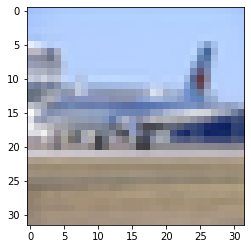

In [ ]:
image,image_data=ReadImage('airplane1.png')
plt.imshow(image_data)
k1=np.random.random((3,3,3))

Kernel
[[[0.55891993 0.55374078 0.3983726 ]
  [0.81576997 0.62270512 0.70363404]
  [0.04274197 0.67383319 0.66013541]]

 [[0.01546542 0.07245119 0.17329013]
  [0.63850852 0.84845392 0.63057624]
  [0.27519026 0.77943842 0.44864816]]

 [[0.19513451 0.01083066 0.35109043]
  [0.33712058 0.63358897 0.55469287]
  [0.92138951 0.32003239 0.59228773]]]
Activation map


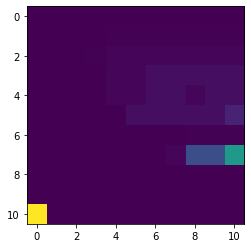

In [ ]:
activation_map=Convolution(image_data,k1,[3,3],[1,1],'sigmoid')

Kernel
[[[0.55891993 0.55374078 0.3983726 ]
  [0.81576997 0.62270512 0.70363404]
  [0.04274197 0.67383319 0.66013541]]

 [[0.01546542 0.07245119 0.17329013]
  [0.63850852 0.84845392 0.63057624]
  [0.27519026 0.77943842 0.44864816]]

 [[0.19513451 0.01083066 0.35109043]
  [0.33712058 0.63358897 0.55469287]
  [0.92138951 0.32003239 0.59228773]]]
Activation map


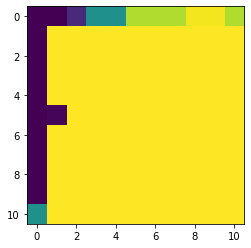

In [ ]:
activation_map=Convolution(image_data,k1,stride=[3,3],padding=[1,1],non_linear_fn='tanh')

Kernel
[[[0.55891993 0.55374078 0.3983726 ]
  [0.81576997 0.62270512 0.70363404]
  [0.04274197 0.67383319 0.66013541]]

 [[0.01546542 0.07245119 0.17329013]
  [0.63850852 0.84845392 0.63057624]
  [0.27519026 0.77943842 0.44864816]]

 [[0.19513451 0.01083066 0.35109043]
  [0.33712058 0.63358897 0.55469287]
  [0.92138951 0.32003239 0.59228773]]]
Activation map


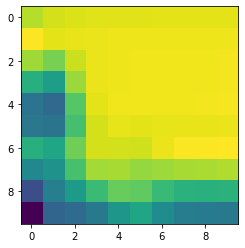

In [ ]:
activation_map=Convolution(image_data,k1,stride=[3,3],padding=[0,0],non_linear_fn='relu')

Kernel
[[[0.55891993 0.55374078 0.3983726 ]
  [0.81576997 0.62270512 0.70363404]
  [0.04274197 0.67383319 0.66013541]]

 [[0.01546542 0.07245119 0.17329013]
  [0.63850852 0.84845392 0.63057624]
  [0.27519026 0.77943842 0.44864816]]

 [[0.19513451 0.01083066 0.35109043]
  [0.33712058 0.63358897 0.55469287]
  [0.92138951 0.32003239 0.59228773]]]
Activation map


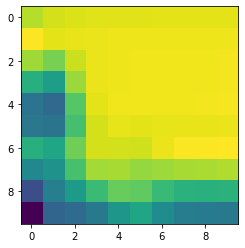

In [ ]:
activation_map=Convolution(image_data,k1,stride=[3,3],padding=[0,0],non_linear_fn='prelu')

#Pooling function:

It accepts as input the activation map output from the convolution function, a
pooling function, and stride. The function must output the appropriately pooled activation map.
Display the input activation map and the pooled output. (2)

In [ ]:
def Pool(activation_patch,pooling_fn):
  if pooling_fn=='max':
    return np.max(activation_patch)
  if pooling_fn=='min':
    return np.min(activation_patch)
  if pooling_fn=='avg':
    return np.average(activation_patch) 

In [ ]:
def Pooling(activation_map,kernel_shape,stride,pooling_fn='max',display=True):
  if display:
   plt.imshow(activation_map)
  h,w=activation_map.shape
  op_dim=[int((h-kernel_shape[0]+1)/stride[0]),int((w-kernel_shape[1]+1)/stride[1])]
  pooled_activation_map=np.zeros(op_dim[0]*op_dim[1]).reshape(op_dim[0],op_dim[1])
  for i in range(op_dim[0]):
          for j in range(op_dim[1]):
              activation_patch=ExtractImgPatch(activation_map[:,:],i,j,kernel_shape[0],kernel_shape[1],stride)
              pooled_activation_map[i,j]=Pool(activation_patch,pooling_fn)
  if display:            
    plt.imshow(Rescale(pooled_activation_map))
  return pooled_activation_map 

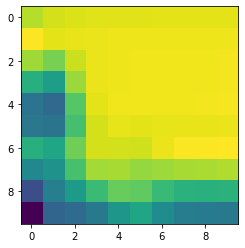

In [ ]:
plt.imshow(activation_map)

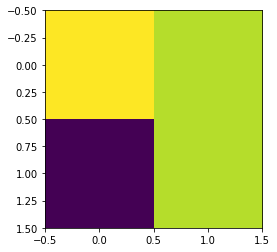

In [ ]:
pooled_activation_map=Pooling(activation_map,k1.shape,[3,3])

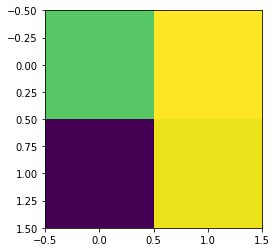

In [ ]:
pooled_activation_map=Pooling(activation_map,k1.shape,[3,3],'min')

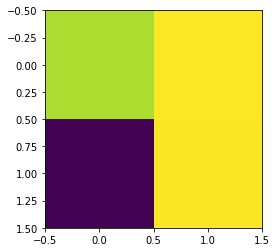

In [ ]:
pooled_activation_map=Pooling(activation_map,k1.shape,[3,3],'avg')

#Convolution layer function:

It accepts as input a volume (image or activation maps), filter kernels,
stride, padding and the non-linear function. The function must convolve the input volume (after
padding if specified) with each of the kernels (at the specified stride size) and generates an output
activation volume after applying the specified non-linearity. Display the input image or activation
maps, the filter kernels and the output activation maps. Verify that the output of this function does
indeed have the expected size (W × H × C) as discussed in class. (1)

In [ ]:
def ConvolutionLayer(volume,kernels,stride,padding=[0,0],non_linear_fn='tanh',display=True):
  if display:
    plt.imshow(volume)  
    plt.show()
  for i in range(len(kernels)):
      activation_map=Convolution(volume,kernels[i],stride,padding,non_linear_fn,display=False)
      if i == 0:
        h,w=activation_map.shape
        activation_volume=np.zeros(h*w*len(kernels)).reshape(h,w,len(kernels))
      activation_volume[:,:,i]=activation_map 
  if display:      
   plt.imshow(activation_volume)  
   plt.show()    
  return activation_volume       

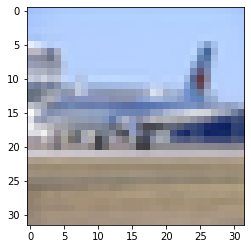

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


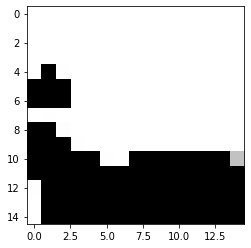

In [ ]:
activation_vol=ConvolutionLayer(image_data,kernels=[k1,k1,k1],stride=[2,2],non_linear_fn='tanh')

#Pooling layer function:

It accepts as input the activation map volume, the pooling function, stride,
and generates a pooled output volume. Display the input and output volumes.

In [ ]:
def PoolingLayer(activation_volume,kernel_shape,stride,pooling_fn='max',display=True):
   h,w,channels=activation_volume.shape
   if display:
    plt.imshow(activation_volume)
    plt.show()
   for i in range(channels):
      pooled_op= Pooling(activation_volume[:,:,i],kernel_shape,stride,pooling_fn,display)
      if i == 0:
        h,w=pooled_op.shape
        pooling_volume=np.zeros(h*w*channels).reshape(h,w,channels)
      pooling_volume[:,:,i]=pooled_op
   if display:    
    plt.imshow(pooling_volume)
    plt.show()
   return pooling_volume

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


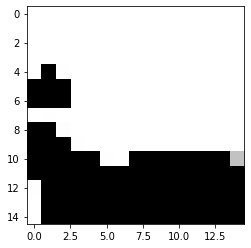

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


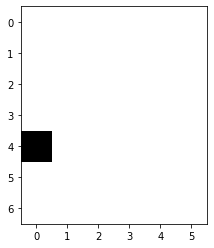

In [ ]:
pooled_volume=PoolingLayer(activation_vol,[2,3],[2,2],'max')

#Flattening (unraveling) function:

It accepts as input the activation map volume output by the pooling layer and generates a vector of a specified size. It is important to note that this function has a
weight matrix associated with it whose size is chosen such that the input and desired output sizes are
matched.

In [ ]:
def Flattening(activation_vol,size):
  bottleneck_vector=np.array(activation_vol).flatten()
  weight_matrix=np.random.random((len(bottleneck_vector),size))
  bottleneck_vector=np.matmul(bottleneck_vector,weight_matrix)
  return bottleneck_vector

In [ ]:
bottleneck_vector=Flattening(activation_vol,10)

#Multilayer Perceptron (MLP) function (Fully Connected):

It accepts as input a vector, the number of
hidden layers, the size of each hidden layer, the non-linear function, and the size of the output layer.
This function should generate an output vector of the specified size. Generate the output with and
without the softmax function applied to the output layer. (2)

In [ ]:
def softmax(op):
  probabilities=np.exp(op)/np.sum(np.exp(op))
  return probabilities    

In [ ]:
def MLP(vector,number_hidden_layers,sizes,non_linear_fn,op,apply_softmax_op=True):
  ip_vector=vector.copy()
  for i in range(number_hidden_layers):
      op_size=sizes[i]
      weight_vector=np.random.random((len(ip_vector),op_size))
      input=np.matmul(ip_vector,weight_vector)
      ip_vector=np.zeros(len(input))
      for i in range(len(input)):
        ip_vector[i]=Activationfn(input[i],non_linear_fn)
  weight_vector=np.random.random((len(ip_vector),op))
  output=np.matmul(ip_vector,weight_vector) 
  output_vector=np.zeros(len(output))
  if apply_softmax_op:
    output_vector=softmax(np.array(output))
    return output_vector 
  else:
    return output    

In [ ]:
len(bottleneck_vector)

10

Output vector without softmax 

In [ ]:
op_vector=MLP(bottleneck_vector,1,[10],'sigmoid',10,False)

In [ ]:
op_vector

array([2.59320072, 6.22257054, 5.39356468, 4.89147185, 4.76073626,
       5.29706516, 5.43820457, 3.42023231, 3.17401586, 5.82750694])

Output vector with softmax

In [ ]:
op_vector=MLP(bottleneck_vector,1,[10],'sigmoid',10)

In [ ]:
op_vector

array([0.05139536, 0.0823817 , 0.08344949, 0.05409957, 0.19328849,
       0.15520138, 0.25616551, 0.06028663, 0.04121094, 0.02252094])

Output vectors with softmax are probabilities

#Feed-forward path:

Finally, use the functions you have written to implement a CNN with the follow-
ing architecture. The CNN must accept an image input and output a vector of appropriate dimension.

In other words, the function must effectively implement the feed-forward path in a CNN. (3)
• Input image of size 32 × 32 × 3. Use images from the CIFAR-10 dataset.
• Convolution layer with 16 kernels of size 3 × 3 × 3 and sigmoid activation.
• Max pooling layer of size 2 × 2 with a stride of 2 along each dimension.
• Convolution layer with 8 kernels of size 3 × 3 × C2 and sigmoid activation. What is the value of
C2?.
• Max pooling layer of size 2 × 2 with a stride of 2 along each dimension.
• A flattening layer. Note that the input size is fixed by the previous layer’s output. Your flattening
matrix can be square, tall, or fat. Any choice is fine for this problem. Pick any one.
• An MLP with one hidden layer that accepts as input the flattening layer output and maps it to
10 output nodes. Use sigmoid activation for the MLP.

Verify that your composition of function accepts and image input and outputs a vector.

In [ ]:
def FeedForward(image,mlp=True):
  kernels=[]
  for i in range(16):
    kernels.append(np.random.random((3,3,3)))
  activation_maps=ConvolutionLayer(image,kernels,stride=[1,1],padding=[0,0],non_linear_fn='sigmoid',display=False)
  pooled_activation_volume=PoolingLayer(activation_maps,[3,3],[1,1],display=False)
  kernels.clear()
  for i in range(8):
    kernels.append(np.random.random((3,3,16)))
  activation_maps=ConvolutionLayer(pooled_activation_volume,kernels,stride=[1,1],padding=[0,0],non_linear_fn='sigmoid',display=False)
  pooled_activation_maps=PoolingLayer(activation_maps,[3,3],[1,1],display=False)
  flattened_op=Flattening(pooled_activation_map,10)
  if mlp:
    op_vector=MLP(flattened_op,1,[10],'sigmoid',10)
    return op_vector
  else:
    return flattened_op  

In [ ]:
o=FeedForward(image_data)

In [ ]:
np.argmax(o)

8

#Choose an image from each of the 10 classes and display the output vector for each case. Do you see any trend in the output vectors? (1)

In [ ]:
image,image_data=ReadImage('airplane1.png')
op_vec=FeedForward(image_data)
print(op_vec)
np.argmax(op_vec)

[0.07374406 0.07115086 0.07437058 0.03013537 0.00644599 0.45888848
 0.01109162 0.04086601 0.04579092 0.1875161 ]


5

In [ ]:
image,image_data=ReadImage('automobile1.png')
op_vec=FeedForward(image_data)
print(op_vec)
np.argmax(op_vec)

[0.03471946 0.02278123 0.01736025 0.13913406 0.08145684 0.0932777
 0.03469038 0.30033503 0.22275783 0.05348721]


7

In [ ]:
image,image_data=ReadImage('bird1.png')
op_vec=FeedForward(image_data)
print(op_vec)
np.argmax(op_vec)

[0.09197922 0.05373668 0.28936979 0.1617684  0.03027733 0.01756334
 0.04493072 0.07676173 0.11377552 0.11983727]


2

In [ ]:
image,image_data=ReadImage('cat1.png')
op_vec=FeedForward(image_data)
print(op_vec)
np.argmax(op_vec)

[0.05025242 0.13357573 0.06139736 0.06452387 0.14199658 0.00611081
 0.02153446 0.23697281 0.06318841 0.22044755]


7

In [ ]:
image,image_data=ReadImage('deer1.png')
op_vec=FeedForward(image_data)
print(op_vec)
np.argmax(op_vec)

[0.11719123 0.13194998 0.04322527 0.05828256 0.03506791 0.03726997
 0.31672295 0.16758579 0.04857227 0.04413207]


6

In [ ]:
image,image_data=ReadImage('dog1.png')
op_vec=FeedForward(image_data)
print(op_vec)
np.argmax(op_vec)

[0.0714306  0.04803331 0.11849459 0.29738941 0.01883015 0.06457583
 0.04840699 0.23869819 0.05728448 0.03685646]


3

In [ ]:
image,image_data=ReadImage('frog1.png')
op_vec=FeedForward(image_data)
print(op_vec)
np.argmax(op_vec)

[0.24511397 0.09934547 0.04112861 0.11789438 0.01660852 0.03669242
 0.18541264 0.0255755  0.09525449 0.13697399]


0

In [ ]:
image,image_data=ReadImage('horse1.png')
op_vec=FeedForward(image_data)
print(op_vec)
np.argmax(op_vec)

[0.05402967 0.29909725 0.05463152 0.04500621 0.02905147 0.04982135
 0.02645541 0.13613787 0.14607409 0.15969516]


1

In [ ]:
image,image_data=ReadImage('ship1.png')
op_vec=FeedForward(image_data)
print(op_vec)
np.argmax(op_vec)

[0.02378988 0.02448366 0.06129807 0.12680108 0.33421686 0.04366102
 0.05998721 0.10847263 0.10874015 0.10854945]


4

In [ ]:
image,image_data=ReadImage('truck1.png')
op_vec=FeedForward(image_data)
print(op_vec)
np.argmax(op_vec)

[0.0904225  0.08227459 0.14948214 0.02026868 0.02511442 0.01103918
 0.06528152 0.39881627 0.12874933 0.02855136]


7

*We can clearly notice from that the output vectors are probabilities of the image falling into a particular class.* 

*The above vector shows that airplane,automobile, bird,deer, dog, frog,horse, sheep all are being predicted to be in different classes.*

*Whereas automobile,truck and dog are falling into the same class.*

*This shows that even in a single forward pass network is able to discriminate among most of the classes.*

*With successive forward passes and backpropogation methods network can slowly learn to distinguish between classes very clearly.*

#Does a randomly initialized network show any discriminability? Visualize the bottleneck layer(output of flattening layer) using builtin tSNE plots. Choose three images per class. If you are wondering about this question, check out the Deep Image Prior paper.

In [ ]:
def datasamples():
  d1=['airplane1.png','automobile1.png','bird1.png','cat1.png','deer1.png','dog1.png','frog1.png','horse1.png','ship1.png','truck1.png',
      'airplane2.png','automobile2.png','bird2.png','cat2.png','deer2.png','dog2.png','frog2.png','horse2.png','ship2.png','truck2.png',
      'airplane3.png','automobile3.png','bird3.png','cat3.png','deer3.png','dog3.png','frog3.png','horse3.png','ship3.png','truck3.png']
  datasamples=[ ]
  for i in range(len(d1)):
     image,image_data=ReadImage(d1[i])
     bottleneck_vector=FeedForward(image_data,mlp=False)
     datasamples.append(bottleneck_vector)
  return np.array(datasamples)   

In [ ]:
ds=datasamples()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


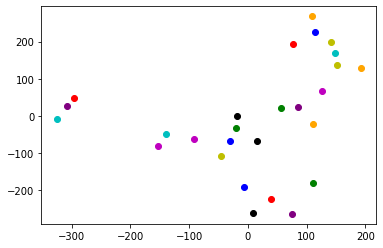

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0,perplexity=3)
samples_2d = tsne.fit_transform(ds)
classes = range(10)
labels=[0,1,2,3,4,5,6,7,8,9]
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i in range(len(samples_2d)):
     plt.scatter(samples_2d[i, 0], samples_2d[i, 1], c=colors[i%10], label=labels[i%10])
plt.show()

*Plot shows two dimesional representation of the flattened vectors that we get from a forward pass of the network*

*Randomly intialized weights does not show discriminability that can be observed from the plot all the weights in the network are randomly initialized and we can observe that in with a single feed forward pass model is not able to discrimate between the classes and form separate clusters based on the flattened output.*